In [1]:
#importing libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPooling2D,InputLayer

In [2]:
#loading the dataset from keras
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.mnist.load_data()

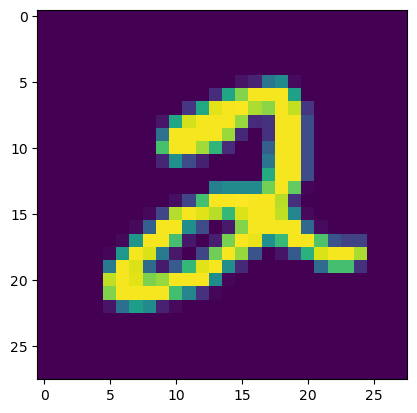

In [3]:
plt.imshow(X_train[5])

In [4]:
y_train.size

60000

In [5]:
X_train.shape
#we have 6000 images with each 28*28 pixels

(60000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
#we make the input data into a 3D array
X_train = np.expand_dims(X_train,axis = -1)
X_test = np.expand_dims(X_test,axis = -1)

In [8]:
X_train.shape

(60000, 28, 28, 1)

In [9]:
#we scale the individual pixel values between 0 and 1
X_train = X_train/255
X_test = X_test/255

In [10]:
#we define our model architecture,with input shape as that of X
model = Sequential([
    InputLayer(input_shape=(28, 28, 1)),
    Conv2D(32,3,padding = 'same',activation = 'relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(16,3,padding = 'same',activation = 'relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(12,3,padding = 'same',activation = 'relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(8,3,padding = 'same',activation = 'relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(28,activation = 'relu'),
    Dense(14,activation = 'relu'),
    Dense(10,activation = 'softmax')
])

In [11]:
#model compilation
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),loss = tf.keras.losses.SparseCategoricalCrossentropy(),
             metrics = ['accuracy'])

In [12]:
#we fit model into our data and set aside 30% for validation
net = model.fit(X_train,y_train,batch_size = 10,epochs=5,validation_split = 0.30)

Epoch 1/5


4200/4200 [==============================] - 49s 9ms/step - loss: 0.4216 - accuracy: 0.8658 - val_loss: 0.1744 - val_accuracy: 0.9501
Epoch 2/5
4200/4200 [==============================] - 34s 8ms/step - loss: 0.1330 - accuracy: 0.9591 - val_loss: 0.1315 - val_accuracy: 0.9601
Epoch 3/5
4200/4200 [==============================] - 34s 8ms/step - loss: 0.0957 - accuracy: 0.9715 - val_loss: 0.0750 - val_accuracy: 0.9774
Epoch 4/5
4200/4200 [==============================] - 36s 8ms/step - loss: 0.0746 - accuracy: 0.9769 - val_loss: 0.1065 - val_accuracy: 0.9690
Epoch 5/5
4200/4200 [==============================] - 37s 9ms/step - loss: 0.0649 - accuracy: 0.9795 - val_loss: 0.0621 - val_accuracy: 0.9823


In [13]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0509 - accuracy: 0.9836


[0.05092957988381386, 0.9836000204086304]

In [14]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [15]:
y_pred = model.predict(X_test)
y_pred

313/313 [==============================] - 2s 6ms/step


array([[1.30003670e-08, 1.11807103e-05, 3.38613245e-05, ...,
        9.99874830e-01, 2.13575386e-05, 4.92075997e-05],
       [2.39706525e-04, 1.73038279e-05, 9.99537230e-01, ...,
        2.04334984e-08, 1.59888048e-04, 1.62179234e-07],
       [3.72319619e-06, 9.99424934e-01, 4.15850627e-05, ...,
        8.33167069e-05, 1.00581674e-04, 3.30039547e-05],
       ...,
       [3.99389809e-12, 3.47615825e-09, 4.86409307e-13, ...,
        2.93399882e-09, 5.50334756e-09, 3.10661835e-06],
       [9.66148264e-07, 2.58716330e-11, 9.96323246e-10, ...,
        1.74417902e-08, 6.41653873e-03, 6.58026329e-05],
       [8.00002235e-05, 2.21797674e-08, 1.78721464e-07, ...,
        2.67467445e-13, 4.95840941e-05, 9.85089741e-07]], dtype=float32)

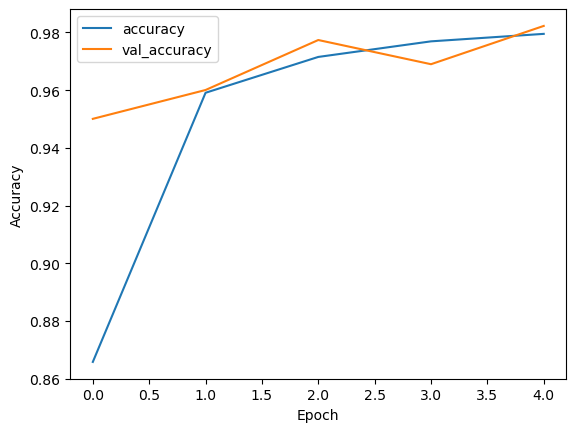

In [16]:
plt.plot(net.history['accuracy'], label = 'accuracy')
plt.plot(net.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

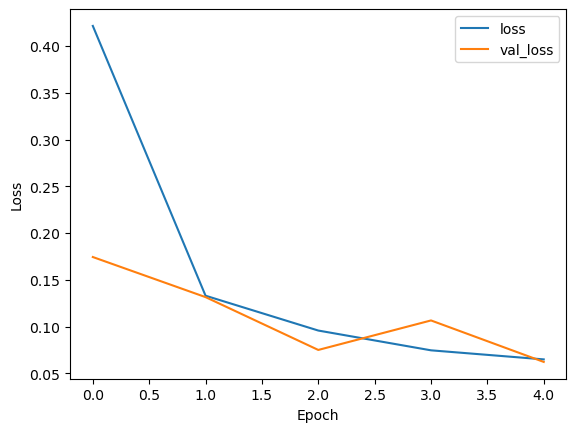

In [17]:
plt.plot(net.history['loss'], label = 'loss')
plt.plot(net.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

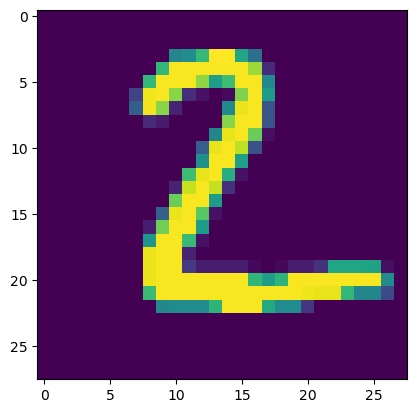

In [18]:
plt.imshow(X_test[1])

In [ ]:
print(model.predict(X_test[1]))